<a href="https://colab.research.google.com/github/NoteAP00/basic-machine-learning-using-scikit-learn/blob/master/006-Binary-Classifier_changeMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classifier
Distinguish between 2 classes

![alt text](https://jakelearnsdatascience.files.wordpress.com/2017/02/lda_binary.png "Binary Classification")

## Loading MNIST dataset using scipy library

In [19]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/csv')
!ls

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mnist-original.mat


https://drive.google.com/drive/folders/1uqn3m0u7jeNSzbN2AIZQy6AGbZBtSQNF?usp=drive_link

In [20]:
from scipy.io import loadmat

mnist_raw = loadmat("/content/drive/My Drive/csv/mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X,y = mnist['data'], mnist['target']

In [21]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


## Using Stochastic Descent

In [22]:
# target / class / y
print(y_train)

[0. 0. 0. ... 9. 9. 9.]


In [23]:
# Start by only trying to ID "five" digits.

y_train_5 = (y_train == 5) # create target vectors
y_test_5  = (y_test == 5)

# 5 = True
# other = False

print(y_train_5.shape, y_train_5)
print(y_test_5.shape, y_test_5)

(60000,) [False False False ... False False False]
(10000,) [False False False ... False False False]


## SGD Classifier

In [24]:
def plot_digit(X):
    plt.imshow(
    X.reshape(28, 28),
    cmap = plt.cm.binary,
    interpolation="nearest")

    plt.axis("off")
    plt.show()

def print_pred_data(clf, actual_y, X):
    print("Actual : ", actual_y)
    print("Prediction : ", clf.predict([X])[0])

In [25]:
# SGD classifier: good at handling large DBs
#                 also good at handling one-at-a-time learning
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# Prediction

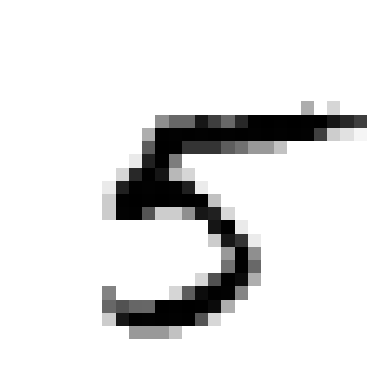

Actual :  True
Prediction :  True


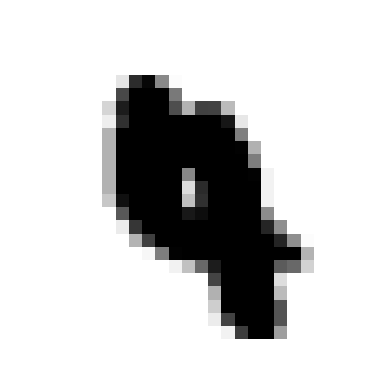

Actual :  False
Prediction :  False


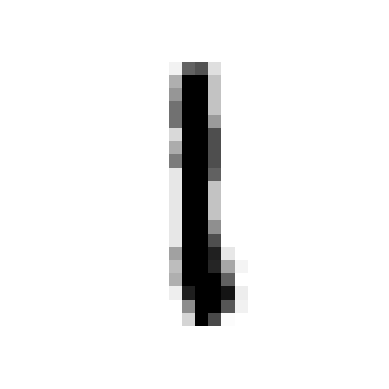

Actual :  False
Prediction :  False


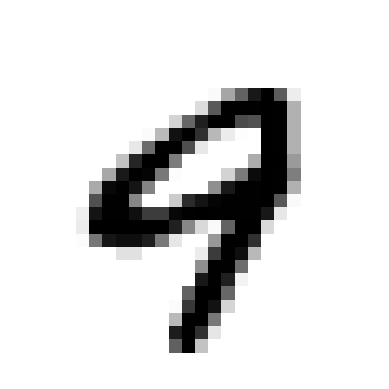

Actual :  False
Prediction :  False


In [26]:
# did it correctly predict the "five" found above?
pred_digit = 5500
plot_digit(X_test[pred_digit])
print_pred_data(sgd_clf, y_test_5[pred_digit], X_test[pred_digit])

#==
pred_digit = 5000
plot_digit(X_test[pred_digit])
print_pred_data(sgd_clf, y_test_5[pred_digit], X_test[pred_digit])

#==
pred_digit = 1000
plot_digit(X_test[pred_digit])
print_pred_data(sgd_clf, y_test_5[pred_digit], X_test[pred_digit])

#==
pred_digit = 9999
plot_digit(X_test[pred_digit])
print_pred_data(sgd_clf, y_test_5[pred_digit], X_test[pred_digit])

## Performance measures

In [27]:
# measure accuracy using K-fold (n=3) cross-validation scores
from sklearn.model_selection import cross_val_score

print(cross_val_score(
        sgd_clf,
        X_train,
        y_train_5,
        cv=3,
        scoring="accuracy"))

[0.89345 0.75235 0.7899 ]


## Confusion matrix
a better way of evaluating a classifier

In [28]:
# general idea: count #times instances of A are classified as B.
# first, need a set of predictions.
from sklearn.model_selection import cross_val_predict

# Generate cross-val'd predictions for each datapoint
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# ROWS = actual classes
# COLS = predicted classes

In [29]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[44363 10216]
 [ 1070  4351]]


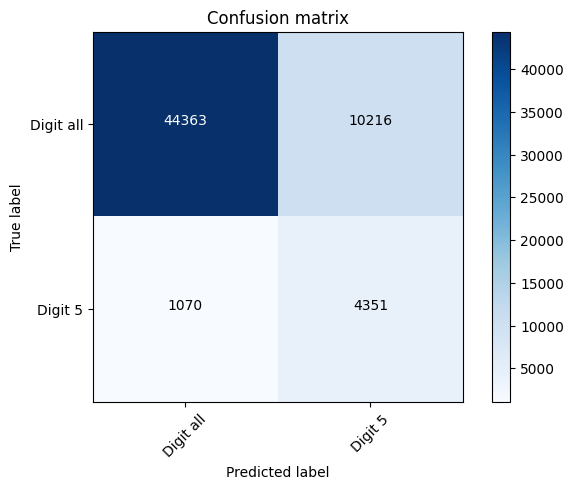

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

plt.figure()
classes = ['Digit all', 'Digit 5']
plot_confusion_matrix(cm, classes)

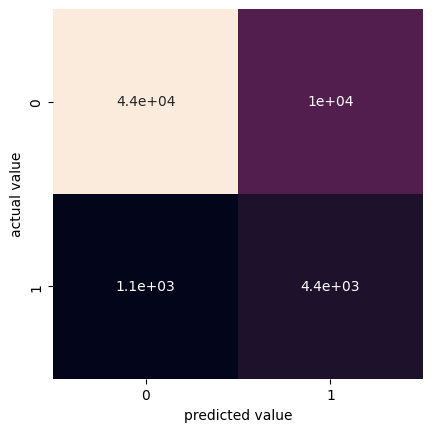

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [32]:
# precision, recall, f1 metrics
# precision/recall tradeoff: increasing one reduces the other.

from sklearn.metrics import precision_score, recall_score, f1_score

print("precision:",precision_score(y_train_5, y_train_pred))
print("recall:",recall_score(y_train_5, y_train_pred))

# F1 score favors classifiers with similar precision & recall.
print("f1:",f1_score(y_train_5, y_train_pred))

precision: 0.298688817189538
recall: 0.8026194429072127
f1: 0.43536121673003797


https://github.com/bjpcjp/scikit-and-tensorflow-workbooks/blob/master/ch03-classification.ipynb

# test data

In [33]:
from sklearn.metrics import classification_report

y_test_pred = sgd_clf.predict(X_test)

classes = ['Digit all', 'Digit 5']
print(classification_report(y_test_5, y_test_pred, target_names=classes))

              precision    recall  f1-score   support

   Digit all       0.98      0.98      0.98      9108
     Digit 5       0.81      0.83      0.82       892

    accuracy                           0.97     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.97      0.97      0.97     10000



[[8939  169]
 [ 156  736]]


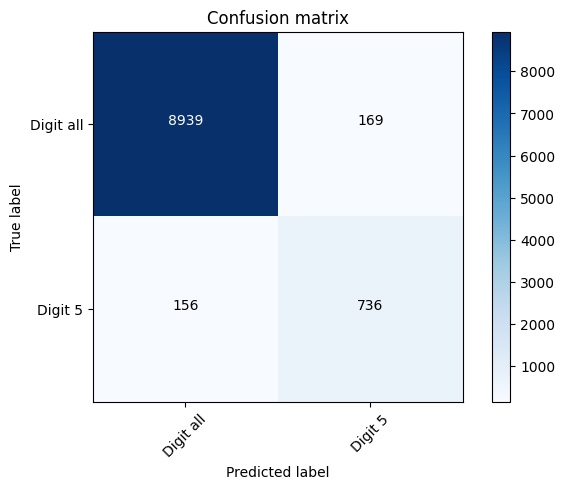

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_test_pred)
print(cm)

plt.figure()
classes = ['Digit all', 'Digit 5']
plot_confusion_matrix(cm, classes)

In [35]:
from sklearn.metrics import accuracy_score

print("Accuracy Score", accuracy_score(y_test_5, y_test_pred)*100)

Accuracy Score 96.75
